# Bubble raft

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from stm.register import create_template
from stm.segment import segment_neighbors
from stm.utils.plotutils import add_colorbar

In [2]:
points = np.load('data/bubbleraft_0003.npy')

a = np.array([0, 1])
b = np.array([np.sin(2/3.*np.pi), np.cos(2/3.*np.pi)])

template = create_template(a, b, n_points=7)

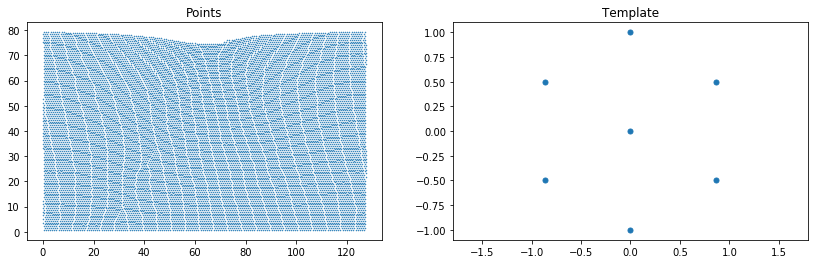

In [3]:
fig,axes = plt.subplots(1,2, figsize=(14,4))

axes[0].plot(points[:,0], points[:,1], 'o', markersize=.5)
axes[0].set_title('Points')

axes[1].plot(template[:,0], template[:,1], 'o', markersize=5)
axes[1].set_title('Template')

for ax in axes:
    ax.axis('equal');

In [4]:
segments = segment_neighbors(points, n_points = 7)

segments.match(template, scale_invariant=True, rmsd_max=.1)

segments.calibrate_strain(proportiontocut=.4)

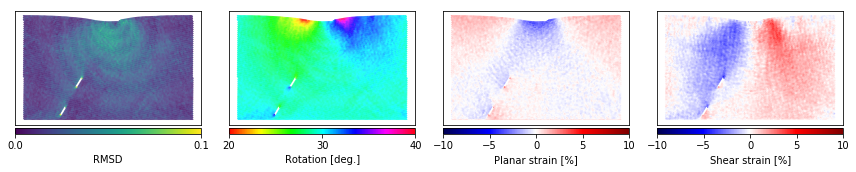

In [5]:
size=.2

fig,axes = plt.subplots(1,4, figsize=(12,4))
m = axes[0].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.rmsd, vmin=0, vmax=.1, s=size)
add_colorbar(axes[0], m, loc='bottom', ticks=np.linspace(0,.2,3), label='RMSD')

m = axes[1].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.rotation/np.pi*180, 
                vmin=20, vmax=40, cmap='hsv', s=size)
add_colorbar(axes[1], m, loc='bottom', ticks=np.linspace(20,40,3), label = 'Rotation [deg.]')

m = axes[2].scatter(segments.origins[:,0], segments.origins[:,1], c=(segments.strain[:,0,0] + segments.strain[:,1,1])/2 * 100, 
                cmap='seismic', vmin=-10, vmax=10, s=size)
add_colorbar(axes[2], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Planar strain [%]')

m = axes[3].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.strain[:,0,1] * 100, 
                cmap='seismic', vmin=-10, vmax=10, s=size)
add_colorbar(axes[3], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Shear strain [%]')

for ax in axes.ravel():
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()